<center><h1><b>MODEL SELECTION</b></h1></center>

In [17]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [18]:
X_train = pd.read_csv(r"data\X_train.csv")
X_test = pd.read_csv(r"data\X_test.csv")
y_train = pd.read_csv(r"data\y_train.csv")
y_test = pd.read_csv(r"data\y_test.csv")

In [19]:
X_train.shape, X_test.shape

((4000, 4), (1000, 4))

In [20]:
y_train.shape, y_test.shape

((4000, 1), (1000, 1))

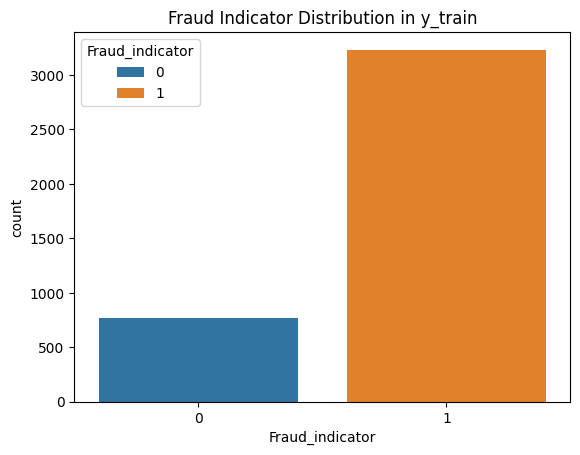

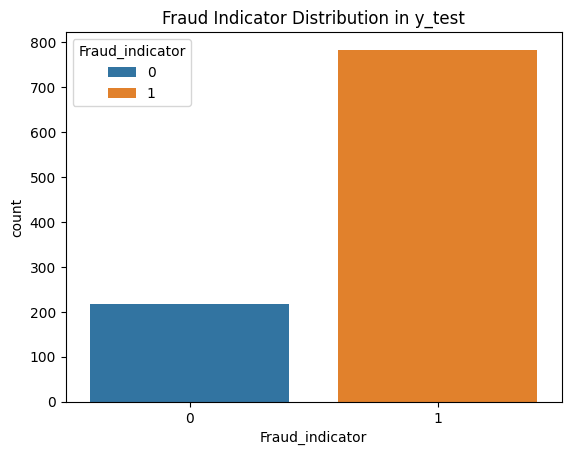

In [21]:
target = {'y_train' : y_train, 'y_test' : y_test}
for name, df in target.items():
    sns.countplot(data = df, x = 'Fraud_indicator', hue = 'Fraud_indicator')
    plt.title(f'Fraud Indicator Distribution in {name}')
    plt.show()
    

In [22]:
y_train = y_train["Fraud_indicator"]
y_test = y_test["Fraud_indicator"]

In [23]:
classification_models = {
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'KNeighborsClassifier:' : KNeighborsClassifier(),
    'SVC' : SVC() 
}

LogisticRegression Cross-Validation Accuracy: 0.94


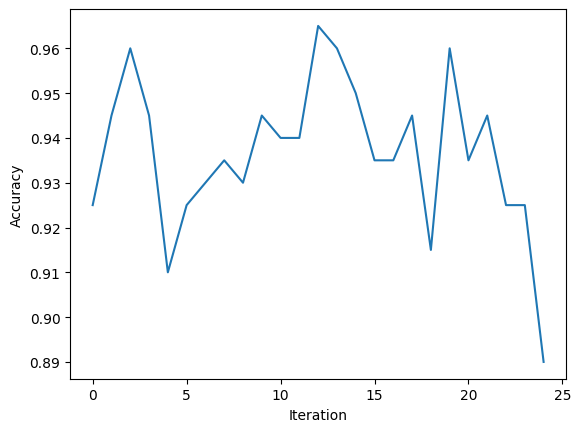

RandomForestClassifier Cross-Validation Accuracy: 1.0


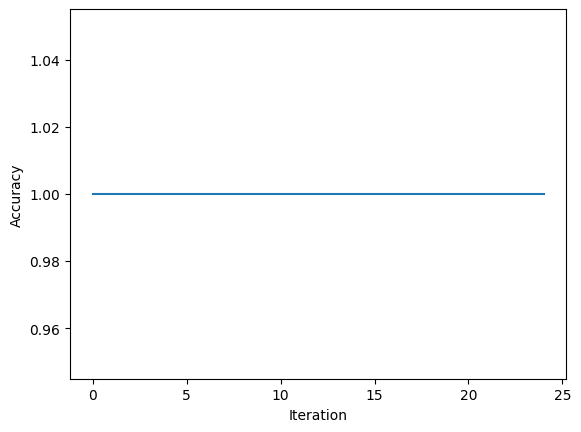

KNeighborsClassifier: Cross-Validation Accuracy: 1.0


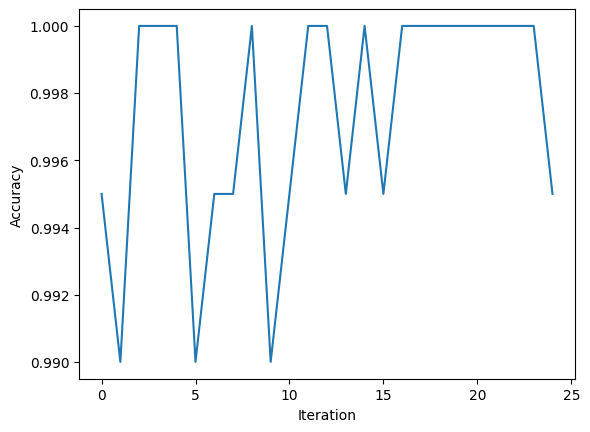

SVC Cross-Validation Accuracy: 0.98


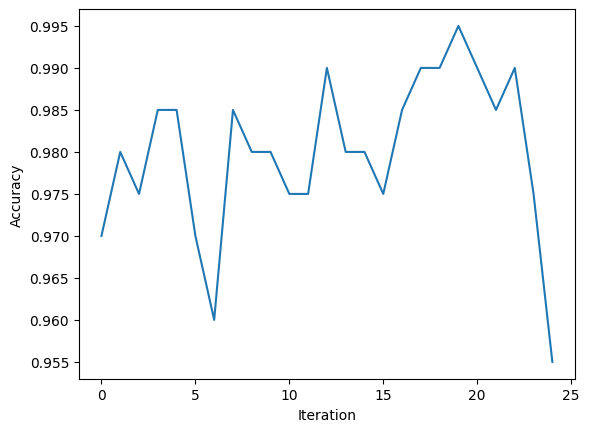

In [24]:
for name, model in classification_models.items():
    scores = cross_val_score(model, pd.concat([X_train, X_test], axis = 0), pd.concat([y_train, y_test], axis = 0), cv=25)
    print(f'{name} Cross-Validation Accuracy: {np.round(np.mean(scores), 2)}')
    plt.plot(scores)
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
    

In [25]:
classification_reports = {}


for model_name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[model_name] = report
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print("".center(100, "="))


best_model_name = max(classification_reports, key=lambda x: classification_reports[x]['accuracy'])
best_model = classification_models[best_model_name]
best_model_accuracy = classification_reports[best_model_name]['accuracy']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.2f}")


best_model_name_f1 = max(classification_reports, key=lambda x: classification_reports[x]['weighted avg']['f1-score'])
best_model_f1 = classification_models[best_model_name_f1]
best_model_f1_score = classification_reports[best_model_name_f1]['weighted avg']['f1-score']

print(f"Best Model based on F1-Score: {best_model_name_f1} with F1-Score: {best_model_f1_score:.2f}")

LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75       217
           1       0.90      1.00      0.95       783

    accuracy                           0.91      1000
   macro avg       0.95      0.80      0.85      1000
weighted avg       0.92      0.91      0.90      1000

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

KNeighborsClassifier: Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       217
           1       1.00      1.00      1.00       783

    accuracy                           1.00   

The best model **Random forest classifier**, since it is clear that the fraud indicator can be ultimately decided based on the newly derived feature Amount_Frauded. That's why the decision based algorithm, the **Random forest classifier achieves a pefect accuracy**